**Course**: ECON310 - Dynamic Macroeconomics

**Student Name**: Pham Ngoc Ha Vi

**PROBLEM SET 2**

## **PART II: Modeling FIRMS in Vietnam**

## 1. Data for small and large firms

In [14]:
import io
import pandas as pd
from google.colab import files

etps_file = files.upload()
master_df = pd.read_excel(io.BytesIO(etps_file['ES_Vietnam_2015.xlsx']))

Saving ES_Vietnam_2015.xlsx to ES_Vietnam_2015.xlsx


In [ ]:
master_df

,idstd2015,id2015,year,d2 (2015 Revenue),n5a (investment),n5b (investment),_2015_k15c (debt),l1 (number of employees),l9a (average years of edu of employees),n2a (labour cost),n6a (value of assets),n6b (value of assets)
0,599613,10697,2015,623000000000,NaN,NaN,NaN,180,12.0,6800000000,8.000000e+09,3.000000e+09
1,599614,10698,2015,98000000000,2.500000e+09,0.0,NaN,140,12.0,11000000000,1.000000e+10,0.000000e+00
2,599615,10700,2015,40000000000,2.000000e+08,0.0,NaN,50,NaN,4500000000,NaN,NaN
3,599616,10702,2015,63000000000,8.000000e+09,0.0,2.400000e+10,110,12.0,8000000000,1.500000e+10,1.100000e+10
4,599617,10705,2015,10000000000,NaN,NaN,NaN,60,9.0,4000000000,1.200000e+09,1.400000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
991,599826,14534,2015,2000000000,1.000000e+09,0.0,NaN,12,NaN,700000000,NaN,NaN
992,599827,14543,2015,1000000000,NaN,NaN,NaN,5,NaN,150000000,NaN,NaN
993,599828,14577,2015,300000000,NaN,NaN,NaN,7,NaN,160000000,NaN,NaN
994,599829,14675,2015,49000000000,3.000000e+07,0.0,NaN,20,-9.0,720000000,-9.000000e+00,-9.000000e+00


*   **d2 (2015 Revenue)**: total annual sales for ALL products and services
*   **n5a (investment)**: the value of assets after depreciation (New or used machinery, vehicles, and equipment)
*   **n5b (investment)**: the value of assets after depreciation (land, buildings)
*   **_2015_k15c (debt)**: total value of open lines of credit or outstanding loans
*   **l1 (number of employees)**: total number of permanent, full-time individuals worked in the firm
*   **l9a (average years of edu of employees)**: Average number of years of education of typical production worker
*   **n2a (labour cost)**: total annual cost of labor including wages, salaries, bonuses, social securities payments
*   **n6a (value of assets)**: the value of assets after depreciation (machinery, vehicles, and equipment)
*   **n6b (value of assets)**: the value of assets after depreciation (land & buildings)

In [16]:
master_df["total_investment"] = master_df["n5a (investment)"] + master_df["n5b (investment)"]
master_df["total_capital"] = master_df["n6a (value of assets)"] + master_df["n6b (value of assets)"]

# Keep only aggregate columns for investment and capital
master_df = master_df.drop(columns=["n5a (investment)", "n5b (investment)", "n6a (value of assets)", "n6b (value of assets)"])

# Rename columns
master_df = master_df.rename(columns={
    "d2 (2015 Revenue)": "revenue",
    "_2015_k15c (debt)": "debt",
    "l1 (number of employees)": "headcount",
    "l9a (average years of edu of employees)": "avg_edu_employees",
    "n2a (labour cost)": "labour_cost",
    "total_investment": "total_investment",
    "total_capital": "total_capital"
})

master_df

,idstd2015,id2015,year,revenue,debt,headcount,avg_edu_employees,labour_cost,total_investment,total_capital
0,599613,10697,2015,623000000000,NaN,180,12.0,6800000000,NaN,1.100000e+10
1,599614,10698,2015,98000000000,NaN,140,12.0,11000000000,2.500000e+09,1.000000e+10
2,599615,10700,2015,40000000000,NaN,50,NaN,4500000000,2.000000e+08,NaN
3,599616,10702,2015,63000000000,2.400000e+10,110,12.0,8000000000,8.000000e+09,2.600000e+10
4,599617,10705,2015,10000000000,NaN,60,9.0,4000000000,NaN,1.520000e+10
...,...,...,...,...,...,...,...,...,...,...
991,599826,14534,2015,2000000000,NaN,12,NaN,700000000,1.000000e+09,NaN
992,599827,14543,2015,1000000000,NaN,5,NaN,150000000,NaN,NaN
993,599828,14577,2015,300000000,NaN,7,NaN,160000000,NaN,NaN
994,599829,14675,2015,49000000000,NaN,20,-9.0,720000000,3.000000e+07,-1.800000e+01


In [17]:
# Split the sample into large and small firms based on median revenue.

median_rev_2015 = master_df["revenue"].median()

small_firms_2015 = master_df[(master_df["revenue"] < median_rev_2015)]
large_firms_2015 = master_df[(master_df["revenue"] > median_rev_2015)]

In [18]:
# Filter outliers to plot relationships between variables: SMALL FIRMS
small_rev_q1 = small_firms_2015["revenue"].quantile(0.25)
small_rev_q3  = small_firms_2015["revenue"].quantile(0.75)
small_rev_IQR = small_rev_q3 - small_rev_q1
small_rev_lower = small_rev_q1 - 1.5*small_rev_IQR
small_rev_upper = small_rev_q3 + 1.5*small_rev_IQR

small_debt_q1 = small_firms_2015["debt"].quantile(0.25)
small_debt_q3  = small_firms_2015["debt"].quantile(0.75)
small_debt_IQR = small_debt_q3 - small_debt_q1
small_debt_lower = small_debt_q1 - 1.5*small_debt_IQR
small_debt_upper = small_debt_q3 + 1.5*small_debt_IQR

small_cap_q1 = small_firms_2015["total_capital"].quantile(0.25)
small_cap_q3  = small_firms_2015["total_capital"].quantile(0.75)
small_cap_IQR = small_cap_q3 - small_cap_q1
small_cap_lower = small_cap_q1 - 1.5*small_cap_IQR
small_cap_upper = small_cap_q3 + 1.5*small_cap_IQR

small_filtered = small_firms_2015[(small_firms_2015["revenue"] < small_rev_upper) & (small_firms_2015["revenue"] > small_rev_lower) &
                                  (small_firms_2015["total_capital"] < small_cap_upper) & (small_firms_2015["total_capital"] > small_cap_lower) &
                                  (small_firms_2015["debt"] < small_debt_upper) & (small_firms_2015["debt"] > small_debt_lower)]

In [19]:
# Replace negative values of debt, total_investment, and total_capital with NaN (we don't want to drop those values, but adjust for more accurate graphing).

import numpy as np

small_filtered.loc[small_filtered['debt'] < 0, 'debt'] = np.nan
small_filtered.loc[small_filtered['total_investment'] < 0, 'total_investment'] = np.nan
small_filtered.loc[small_filtered['total_capital'] < 0, 'total_capital'] = np.nan

# small_filtered

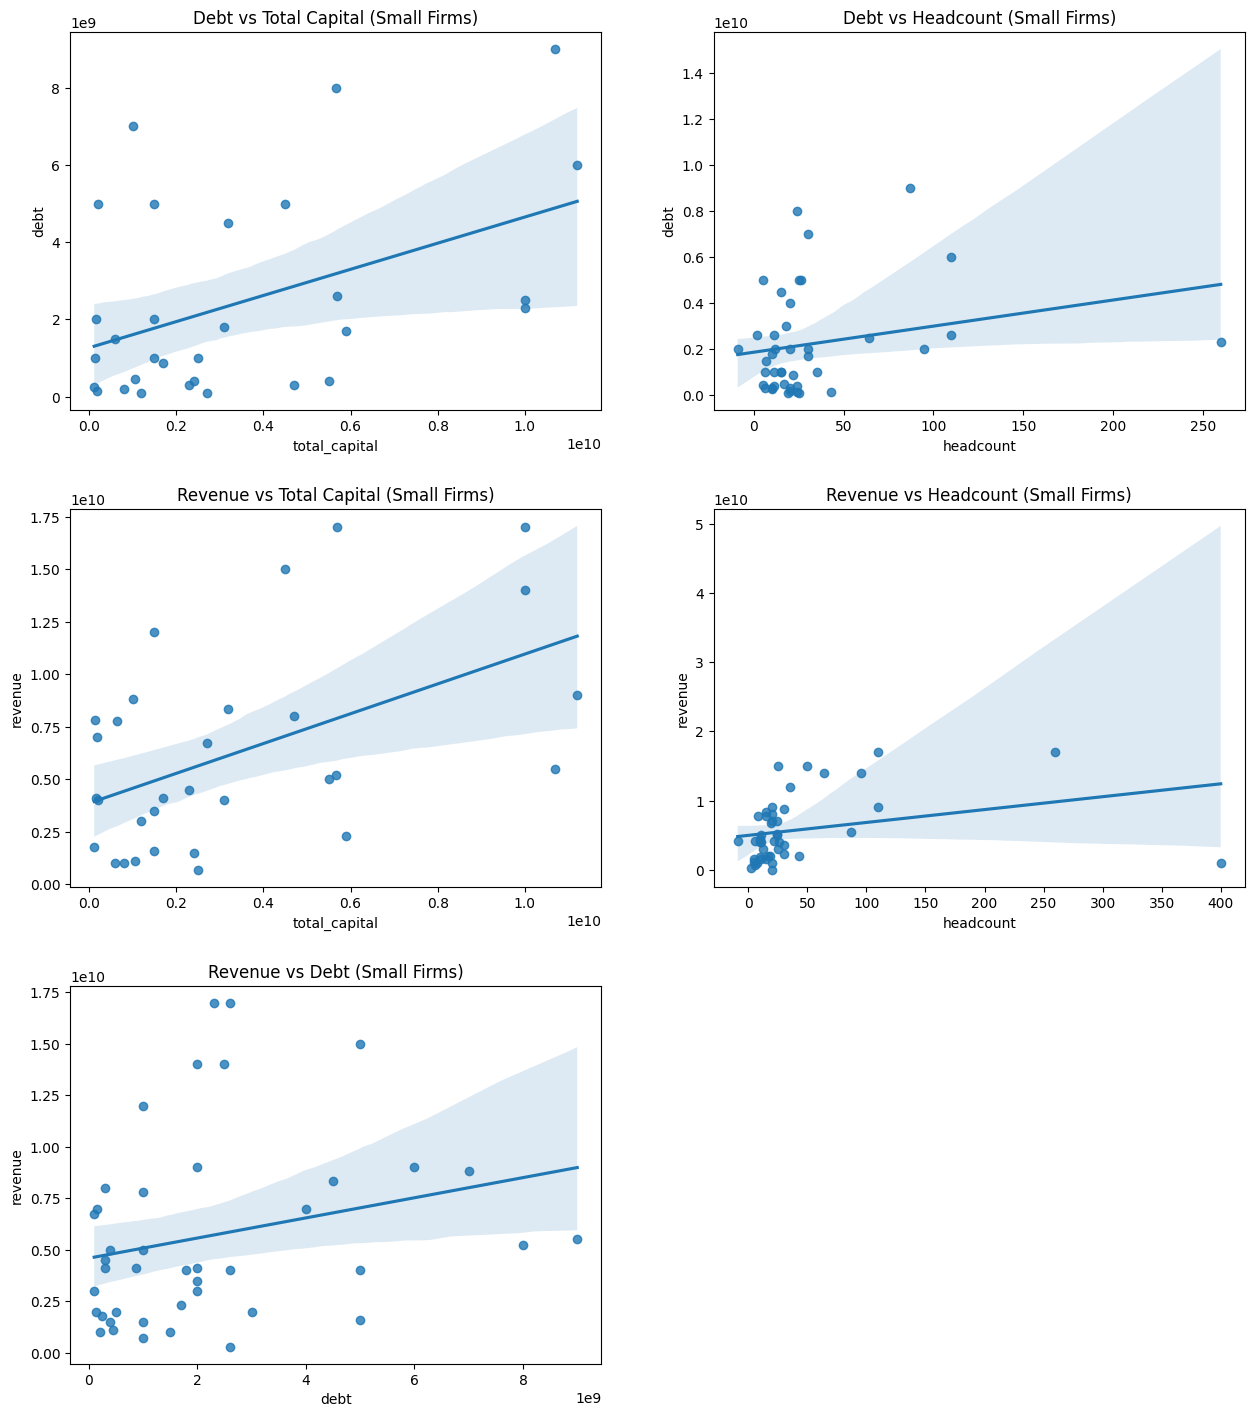

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot relationships between variables for SMALL FIRMS
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.tight_layout(pad=5.0)

# Relationship between debt and production inputs (capital & labour)
sns.regplot(x='total_capital', y='debt', data=small_filtered, ax=axes[0, 0])
axes[0, 0].set_title('Debt vs Total Capital (Small Firms)')
sns.regplot(x='headcount', y='debt', data=small_filtered, ax=axes[0, 1])
axes[0, 1].set_title('Debt vs Headcount (Small Firms)')
# Hide the third plot in the first row as there are only 2 plots requested
fig.delaxes(axes[0, 2])

# Relationship between finance (revenue) and production inputs (capital & labour)
sns.regplot(x='total_capital', y='revenue', data=small_filtered, ax=axes[1, 0])
axes[1, 0].set_title('Revenue vs Total Capital (Small Firms)')
sns.regplot(x='headcount', y='revenue', data=small_filtered, ax=axes[1, 1])
axes[1, 1].set_title('Revenue vs Headcount (Small Firms)')
# Hide the third plot in the second row
fig.delaxes(axes[1, 2])

# Relationship between finance (revenue) and debt
sns.regplot(x='debt', y='revenue', data=small_filtered, ax=axes[2, 0])
axes[2, 0].set_title('Revenue vs Debt (Small Firms)')
# Hide the remaining plots in the third row
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.show()

In [23]:
# Filter outliers to plot relationships between variables: LARGE FIRMS
large_rev_q1 = large_firms_2015["revenue"].quantile(0.25)
large_rev_q3  = large_firms_2015["revenue"].quantile(0.75)
large_rev_IQR = large_rev_q3 - large_rev_q1
large_rev_lower = large_rev_q1 - 1.5*large_rev_IQR
large_rev_upper = large_rev_q3 + 1.5*large_rev_IQR

large_debt_q1 = large_firms_2015["debt"].quantile(0.25)
large_debt_q3  = large_firms_2015["debt"].quantile(0.75)
large_debt_IQR = large_debt_q3 - large_debt_q1
large_debt_lower = large_debt_q1 - 1.5*large_debt_IQR
large_debt_upper = large_debt_q3 + 1.5*large_debt_IQR

large_cap_q1 = large_firms_2015["total_capital"].quantile(0.25)
large_cap_q3  = large_firms_2015["total_capital"].quantile(0.75)
large_cap_IQR = large_cap_q3 - large_cap_q1
large_cap_lower = large_cap_q1 - 1.5*large_cap_IQR
large_cap_upper = large_cap_q3 + 1.5*large_cap_IQR

large_filtered = large_firms_2015[(large_firms_2015["revenue"] < large_rev_upper) & (large_firms_2015["revenue"] > small_rev_lower) &
                                  (large_firms_2015["total_capital"] < large_cap_upper) & (large_firms_2015["total_capital"] > small_cap_lower) &
                                  (large_firms_2015["debt"] < large_debt_upper) & (large_firms_2015["debt"] > small_debt_lower)]

In [24]:
# Replace negative values of debt, total_investment, and total_capital with NaN (we don't want to drop those values, but adjust for more accurate graphing).

large_filtered.loc[large_filtered['debt'] < 0, 'debt'] = np.nan
large_filtered.loc[large_filtered['total_investment'] < 0, 'total_investment'] = np.nan
large_filtered.loc[large_filtered['total_capital'] < 0, 'total_capital'] = np.nan

# large_filtered

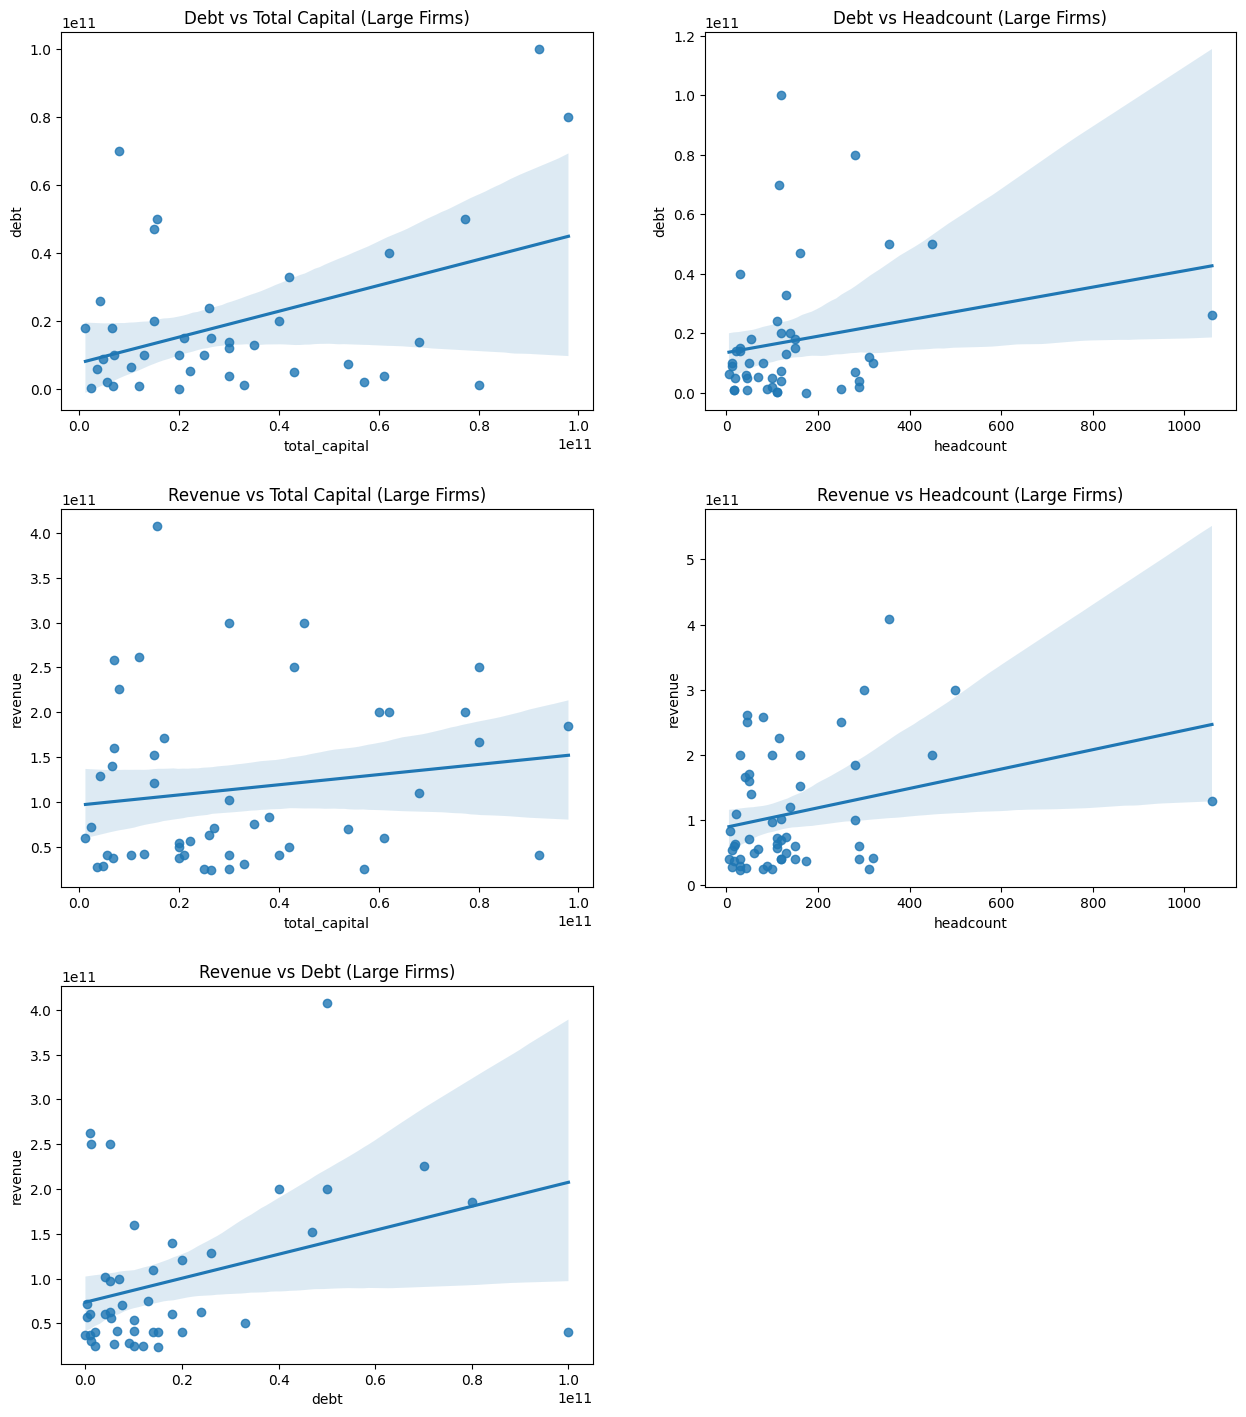

In [ ]:
# Plot relationships between variables for SMALL FIRMS
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.tight_layout(pad=5.0)

# Relationship between debt and production inputs (capital & labour)
sns.regplot(x='total_capital', y='debt', data=large_filtered, ax=axes[0, 0])
axes[0, 0].set_title('Debt vs Total Capital (Large Firms)')
sns.regplot(x='headcount', y='debt', data=large_filtered, ax=axes[0, 1])
axes[0, 1].set_title('Debt vs Headcount (Large Firms)')
# Hide the third plot in the first row as there are only 2 plots requested
fig.delaxes(axes[0, 2])

# Relationship between finance (revenue) and production inputs (capital & labour)
sns.regplot(x='total_capital', y='revenue', data=large_filtered, ax=axes[1, 0])
axes[1, 0].set_title('Revenue vs Total Capital (Large Firms)')
sns.regplot(x='headcount', y='revenue', data=large_filtered, ax=axes[1, 1])
axes[1, 1].set_title('Revenue vs Headcount (Large Firms)')
# Hide the third plot in the second row
fig.delaxes(axes[1, 2])

# Relationship between finance (revenue) and debt
sns.regplot(x='debt', y='revenue', data=large_filtered, ax=axes[2, 0])
axes[2, 0].set_title('Revenue vs Debt (Large Firms)')
# Hide the remaining plots in the third row
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

plt.show()

## 2. Baseline model

In [71]:
"""

model.py
--------
This code sets up the model.

"""

#%% Imports from Python
from numpy import count_nonzero,exp,expand_dims,linspace,tile
from scipy import stats
from types import SimpleNamespace

#%% Firm Investment Model.
class firm():
    '''

    Methods:
        __init__(self,**kwargs) -> Set the firm's attributes.
        setup(self,**kwargs) -> Sets parameters.

    '''

    #%% Constructor.
    def __init__(self,**kwargs):
        '''

        This initializes the model.

        Optional kwargs:
            All parameters changed by setting kwarg.

        '''

        print('--------------------------------------------------------------------------------------------------')
        print('Model')
        print('--------------------------------------------------------------------------------------------------\n')
        print('   The model is a dynamic model of firm investment and is solved via Value Function Iteration.')

        print('\n--------------------------------------------------------------------------------------------------')
        print('Household')
        print('--------------------------------------------------------------------------------------------------\n')
        print('   The firm is infintely-lived.')
        print('   It chooses investment to maximize profit.')

    #%% Set up model.
    def setup(self,**kwargs):
        '''

        This sets the parameters and creates the grids for the model.

            Input:
                self : Model class.
                kwargs : Values for parameters if not using the default.

        '''

        # Namespace for parameters, grids, and utility function.
        setattr(self,'par',SimpleNamespace())
        par = self.par

        print('\n--------------------------------------------------------------------------------')
        print('Parameters:')
        print('--------------------------------------------------------------------------------\n')

        # Technology.
        par.beta = 0.88 # Discount factor.
        par.alpha = 0.6 # Capital's share of income.
        par.delta = 0.15 # Depreciation rate.

        # Production inputs and prices.
        par.w = 1 # Price of labour (wage).
        par.p = 1.0 # Price of investment.
        par.gamma = 0.1 # Speed of adjustment; cost function coefficient.

        par.sigma_eps = 0.07 # Std. dev of productivity shocks.
        par.rho = 0.85 # Persistence of AR(1) process.
        par.mu = 0.0 # Intercept of AR(1) process.

        par.ylen = 7 # Grid size for y.
        par.m = 3 # Scaling parameter for Tauchen.

        # Simulation parameters.
        par.seed_sim = 2025 # Seed for simulation.
        par.T = 1000 # Number of time periods.

        # Set up asset grid.
        par.klen = 300 # Grid size for k.
        par.kmax = 30.0 # Upper bound for k.
        par.kmin = 0.0001 # Minimum k.

        # Set up grid for labor.
        par.llen = par.klen

        # Discretized productivity.
        par.Alen = 7 # Grid size for A.
        par.m = 3 # Scaling parameter for Tauchen.

        # Update parameter values to kwarg values if you don't want the default values.
        for key,val in kwargs.items():
            setattr(par,key,val)

        assert par.beta > 0.0 and par.beta < 1.0
        assert par.alpha > 0.0 and par.alpha < 1.0
        assert par.delta >= 0.0 and par.delta <= 1.0
        assert par.sigma_eps > 0.00
        assert abs(par.sigma_eps) < 1.00
        assert par.p > 0.0
        assert par.gamma >= 0.0
        assert par.klen > 5
        assert par.kmax > par.kmin

        # Set up asset grid.
        par.kgrid = linspace(par.kmin,par.kmax,par.klen) # Equally spaced, linear grid for k (and k').

        # Set up labor grid.
        par.lgrid = linspace(par.kmin,par.kmax,par.llen) # Equally spaced, linear grid for l.

        # Discretize productivity.
        Agrid,pmat = tauchen(par.mu,par.rho,par.sigma_eps,par.Alen,par.m) # Tauchen's Method to discretize the AR(1) process for log productivity.
        par.Agrid = exp(Agrid) # The AR(1) is in logs so exponentiate it to get A.
        par.pmat = pmat # Transition matrix.

        # Revenue and cost functions.
        par.production = production
        par.total_cost = total_cost

        print('beta: ',par.beta)
        print('alpha: ',par.alpha)
        print('delta: ',par.delta)
        print('kmin: ',par.kmin)
        print('kmax: ',par.kmax)
        print('gamma: ',par.gamma)

#%% Revenue Function.
def production(A,k,l,w,alpha):
    #Revenue function.
    output = A*(k**alpha)*(l**(1-alpha)) # New line: Cobb-Douglas production with capital and labor.

    return output

#%% Cost function.

def total_cost(k,p,kgrid,delta,gamma):
    # Convex adjustment cost.

    invest = kgrid-(1.0-delta)*k
    adj_cost = (gamma/2.0)*((invest/k)**2.0)*k # Convex adjustment cost.
    cost = adj_cost + p*invest # Total investment cost.

    return cost


#%% Tauchen's Method.
def tauchen(mu,rho,sigma,N,m):
    """

    This function discretizes an AR(1) process.

            y(t) = mu + rho*y(t-1) + eps(t), eps(t) ~ NID(0,sigma^2)

    Input:
        mu    : Intercept of AR(1).
        rho   : Persistence of AR(1).
        sigma : Standard deviation of error term.
        N     : Number of states.
        m     : Parameter such that m time the unconditional std. dev. of the AR(1) is equal to the largest grid point.

    Output:
        y    : Grid for the AR(1) process.
        pmat : Transition probability matrix.

    """

    #%% Construct equally spaced grid.

    ar_mean = mu/(1.0-rho) # The mean of a stationary AR(1) process is mu/(1-rho).
    ar_sd = sigma/((1.0-rho**2.0)**(1/2)) # The std. dev of a stationary AR(1) process is sigma/sqrt(1-rho^2)

    y1 = ar_mean-(m*ar_sd) # Smallest grid point is the mean of the AR(1) process minus m*std.dev of AR(1) process.
    yn = ar_mean+(m*ar_sd) # Largest grid point is the mean of the AR(1) process plus m*std.dev of AR(1) process.

    y,d = linspace(y1,yn,N,endpoint=True,retstep=True) # Equally spaced grid. Include endpoint (endpoint=True) and record stepsize, d (retstep=True).

    #%% Compute transition probability matrix from state j (row) to k (column).

    ymatk = tile(expand_dims(y,axis=0),(N,1)) # Container for state next period.
    ymatj = mu+rho*ymatk.T # States this period.

    # In the following, loc and scale are the mean and std used to standardize the variable. # For example, norm.cdf(x,loc=y,scale=s) is the standard normal CDF evaluated at (x-y)/s.
    pmat = stats.norm.cdf(ymatk,loc=ymatj-(d/2.0),scale=sigma)-stats.norm.cdf(ymatk,loc=ymatj+(d/2.0),scale=sigma) # Transition probabilities to state 2, ..., N-1.
    pmat[:,0] = stats.norm.cdf(y[0],loc=mu+rho*y-(d/2.0),scale=sigma) # Transition probabilities to state 1.
    pmat[:,N-1] = 1.0-stats.norm.cdf(y[N-1],loc=mu+rho*y+(d/2.0),scale=sigma) # Transition probabilities to state N.

    #%% Output.

    y = expand_dims(y,axis=0) # Convert 0-dimensional array to a row vector.

    if count_nonzero(pmat.sum(axis=1)<0.999999) > 0:
        raise Exception("Some columns of transition matrix don't sum to 1.")

    return y,pmat

In [72]:
"""

solve.py
--------
This code solves the model.

"""

#%% Imports from Python
from numpy import argmax,squeeze,zeros,seterr
from numpy.linalg import norm
from types import SimpleNamespace
import time
seterr(divide='ignore')
seterr(invalid='ignore')

#%% Solve the model using Value Function Iteration.
def do_business(myClass):
    '''

    This function solves the dynamic model of firm investment.

    Input:
        myClass : Model class with parameters, grids, cost function, and profit function.

    '''

    print('\n--------------------------------------------------------------------------------------------------')
    print('Solving the Model by Value Function Iteration')
    print('--------------------------------------------------------------------------------------------------\n')

    # Namespace for optimal policy funtions.
    setattr(myClass,'sol',SimpleNamespace())
    sol = myClass.sol

    # Model parameters, grids and functions.

    par = myClass.par # Parameters.

    beta = par.beta # Discount factor.
    alpha = par.alpha # Capital's share of income.
    delta = par.delta # Depreciation rate
    gamma = par.gamma # Speed of adjustment; cost function coefficient.

    w = par.w # Price of labour (wage).
    p = par.p # Price of investing in capital.

    klen = par.klen # Grid size for k.
    kgrid = par.kgrid # Grid for k (state and choice).

    llen = par.llen # Grid size for l.
    lgrid = par.lgrid # Grid for l (choice).

    Alen = par.Alen # Grid size for A.
    Agrid = par.Agrid[0] # Grid for A.
    pmat = par.pmat # Grid for A.

    production = par.production # Revenue function.
    total_cost = par.total_cost # Cost function.

    # Value Function Iteration.
    v0 = zeros((klen,Alen)) # Guess of value function for each value of k.

    crit = 1e-6;
    maxiter = 10000;
    diff = 1;
    iter = 0;

    t0 = time.time()

    while (diff > crit) and (iter < maxiter): # Iterate on the Bellman Equation until convergence.

        v1 = zeros((klen,Alen)) # Container for V.
        k1 = zeros((klen,Alen)) # Container for k'.
        l1 = zeros((klen,Alen)) # Container for l.
        i1 = zeros((klen,Alen)) # Container for i.
        r1 = zeros((klen,Alen)) # Container for revenue.
        e1 = zeros((klen,Alen)) # Container for investment expenditure.
        p1 = zeros((klen,Alen)) # Container for profit.

        for q in range(0,klen): # Loop over the k-states.
            for j in range(0,Alen): # Loop over the A-states.

                # Macro variables.
                l = kgrid[q]*(((1-alpha)*Agrid[j])/w)**(1/alpha) # New line: solve for labor using first order condition, given A, k, w, alpha (L = [((1-alpha)*A/w))^(1/alpha)]*K
                rev = production(Agrid[j],kgrid[q],l,w,alpha) # Revenue given A and K.
                expend = total_cost(kgrid[q],p,kgrid,delta,gamma) # Total investment expenditure given K.
                prof = rev - w*l - expend # Profit.
                invest = kgrid-(1.0-delta)*kgrid[q] # Investment in new capital.

                # Solve the maximization problem.
                ev = squeeze(v0@pmat[j,:].T); #  The next-period value function is the expected value function over each possible next-period A, conditional on the current state j.
                vall = prof + beta*ev # Compute the value function for each choice of k', given k.
                v1[q,j] = max(vall) # Maximize: vmax is the maximized value function; ind is where it is in the grid.
                k1[q,j] = kgrid[argmax(vall)] # Optimal k'.
                l1[q,j] = lgrid[argmax(vall)] # Optimal l.
                i1[q,j] = invest[argmax(vall)] # Optimal i.
                r1[q,j] = rev # Total revenue.
                e1[q,j] = expend[argmax(vall)] # Total cost.
                p1[q,j] = prof[argmax(vall)] # Profits.

        diff = norm(v1-v0) # Check convergence.
        v0 = v1; # Update guess.

        iter = iter + 1; # Update counter.

        # Print counter.
        if iter%25 == 0:
            print('Iteration: ',iter,'.\n')

    t1 = time.time()
    print('Elapsed time is ',t1-t0,' seconds.')
    print('Converged in ',iter,' iterations.')

    # Macro variables, value, and policy functions.
    sol.v = v1 # Firm value.
    sol.k = k1 # Capital policy function.
    sol.l = l1 # Labor policy function.
    sol.i = i1 # Investment policy function.
    sol.r = r1 # Revenue function.
    sol.e = e1 # Investment expenditure function.
    sol.p = p1 # Profit function.

In [73]:
"""

simulate.py
-----------
This code simulates the model.

"""

#%% Imports from Python
from numpy import cumsum,empty,linspace,nan,squeeze,where,zeros
from numpy.random import choice,rand,seed
from numpy.linalg import matrix_power
from types import SimpleNamespace

#%% Simulate the model.
def earn_profit(myClass):
    '''

    This function simulates the dynamic model of firm investment.

    Input:
        myClass : Model class with parameters, grids, cost and revenue functions, and policy functions.

    '''

    print('\n--------------------------------------------------------------------------------------------------')
    print('Simulate the Model')
    print('--------------------------------------------------------------------------------------------------\n')

    # Namespace for simulation.
    setattr(myClass,'sim',SimpleNamespace())
    sim = myClass.sim

    # Model parameters, grids and functions.

    par = myClass.par # Parameters.
    sol = myClass.sol # Policy functions.

    par.seed_sim # Seed for simulation.

    klen = par.klen # Capital grid size.
    llen = par.llen # Capital grid size.
    Alen = par.Alen # Productivity grid size.
    kgrid = par.kgrid # Capital today (state).
    Agrid = par.Agrid[0] # Productivity today (state).
    pmat = par.pmat # Productivity today (state).

    vpol = sol.v # Firm value.
    kpol = sol.k # Policy function for capital.
    lpol = sol.l # Policy function for labor.
    ipol = sol.i # Policy function for investment.
    rpol = sol.r # Optimal revenue.
    epol = sol.e # Optimal total investment expenditure.
    ppol = sol.p # Optimal profit.

    T = par.T # Time periods.
    Asim = zeros((T*2,1)) # Container for simulated productivity.
    vsim = zeros((T*2,1)) # Container for simulated firm value.
    rsim = zeros((T*2,1)) # Container for simulated output.
    ksim = zeros((T*2,1)) # Container for simulated capital stock.
    lsim = zeros((T*2,1)) # Container for simulated labor.
    isim = zeros((T*2,1)) # Container for simulated investment.
    esim = zeros((T*2,1)) # Container for simulated investment expenditure.
    psim = zeros((T*2,1)) # Container for simulated profit.

    # Begin simulation.

    seed(par.seed_sim)

    pmat0 = matrix_power(pmat,1000)
    pmat0 = pmat0[0,:] # % Stationary distribution.
    cmat = cumsum(par.pmat,axis=1) # CDF matrix.

    A0_ind = choice(linspace(0,Alen,Alen,endpoint=False,dtype=int),1,p=pmat0) # Index for initial productivity.
    k0_ind = choice(linspace(0,klen,klen,endpoint=False,dtype=int),1) # Index for initial capital stock.

    Asim[0] = Agrid[A0_ind] # Productivity in period 1.
    vsim[0] = vpol[k0_ind,A0_ind] # Firm value in period 1 given k0 and A0.
    ksim[0] = kpol[k0_ind,A0_ind] # Capital choice for period 2 given k0 and A0.
    lsim[0] = lpol[k0_ind,A0_ind] # Labor in period 1 given k0 and A0.
    isim[0] = ipol[k0_ind,A0_ind] # Investment in period 1 given k0 and A0.
    rsim[0] = rpol[k0_ind,A0_ind] # Revenue in period 1 given k0 and A0.
    esim[0] = epol[k0_ind,A0_ind] # Investment ependiture in period 1 given k0 and A0.
    psim[0] = ppol[k0_ind,A0_ind] # Profit in period 1 given k0 and A0.

    A1_ind = where(rand(1)<=squeeze(cmat[A0_ind,:])) # Draw productivity for next period.
    At_ind = A1_ind[0][0]

    # Simulate endogenous variables.

    for j in range(1,T*2): # Time loop.
        kt_ind = where(ksim[j-1]==kgrid); # Capital choice in the previous period is the state today. Find where the latter is on the grid.
        Asim[j] = Agrid[At_ind] # Productivity in period t.
        vsim[j] = vpol[kt_ind,At_ind] # Firm value in period t.
        ksim[j] = kpol[kt_ind,At_ind] # Capital stock for period t+1.
        lsim[j] = lpol[kt_ind,At_ind] # Labor in period t.
        isim[j] = ipol[kt_ind,At_ind] # Investment in period t.
        rsim[j] = rpol[kt_ind,At_ind] # Revenue in period t.
        esim[j] = epol[kt_ind,At_ind] # Investment expenditure in period t.
        psim[j] = ppol[kt_ind,At_ind] # Profit in period t.
        A1_ind = where(rand(1)<=squeeze(cmat[At_ind,:])) # Draw next state.
        At_ind = A1_ind[0][0] # State next period.

    # Simulated model.
    sim.Asim = Asim[T:2*T] # Simulated productivity.
    sim.vsim = vsim[T:2*T] # Simulated firm value.
    sim.ksim = ksim[T:2*T] # Simulated capital choice.
    sim.lsim = lsim[T:2*T] # Simulated investment.
    sim.isim = isim[T:2*T] # Simulated investment.
    sim.rsim = rsim[T:2*T] # Simulated revenue.
    sim.esim = esim[T:2*T] # Simulated investment expenditure.
    sim.psim = psim[T:2*T] # Simulated profit.

    print('Simulation done.\n')
    print('--------------------------------------------------------------------------------------------------\n')

In [74]:
"""

my_graph.py
-----------
This code plots the value and policy functions.

"""

#%% Imports from Python
from matplotlib.pyplot import figure,plot,xlabel,ylabel,title,show
from numpy import linspace

#%% Plot the model functions and simulations.
def track_profit(myClass):
    '''

    This function plots the model functions and simulations.

    Input:
        myClass : Model class with parameters, grids, cost and revenue functions, policy functions, and simulations.

    '''

    # Model parameters, policy and value functions, and simulations.
    par = myClass.par # Parameters.
    sol = myClass.sol # Policy functions.
    sim = myClass.sim # Simulations.

    #Plot capital policy function.

    figure(1)
    plot(par.kgrid,sol.k)
    xlabel('$k_t$')
    ylabel('$k_{t+1}$')
    title('Capital Policy Function')

    # Plot investment policy function.

    figure(2)
    plot(par.kgrid,sol.i)
    xlabel('$k_t$')
    ylabel('$i_t$')
    title('Investment Policy Function')

    # Plot revenue function.

    figure(3)
    plot(par.kgrid,sol.r)
    xlabel('$k_t$')
    ylabel('$r_t$')
    title('Revenue Function')

    # Plot expenditure function.

    figure(4)
    plot(par.kgrid,sol.e)
    xlabel('$k_t$')
    ylabel('$C(k_{t+1},A_t,k_t)+pi_t$')
    title('Expenditure Function')

    # Plot profit function.

    figure(5)
    plot(par.kgrid,sol.p)
    xlabel('$k_t$')
    ylabel('$C(k_{t+1},A_t,k_t)+pi_t$')
    title('Profit Function')

    # Plot value function.

    figure(6)
    plot(par.kgrid,sol.v)
    xlabel('$k_t$')
    ylabel('$v_t$')
    title('Value Function')

    tgrid = linspace(1,par.T,par.T,dtype=int)

    # Plot simulated capital choice.

    figure(7)
    plot(tgrid,sim.ksim)
    xlabel('Time')
    ylabel('$k^sim_t$')
    title('Simulated Capital Choice')

    # Plot simulated investment expenditure.

    figure(8)
    plot(tgrid,sim.esim)
    xlabel('Time')
    ylabel('$C(k^{sim}_{t+1},A^{sim}_t,k^{sim}_t)+pi^{sim}_t$')
    title('Simulated Investment Expenditure')

    # Plot simulated investment.

    figure(9)
    plot(tgrid,sim.isim)
    xlabel('Time')
    ylabel('$i^{sim}_t$')
    title('Simulated Investment')

    #show()

--------------------------------------------------------------------------------------------------
Model
--------------------------------------------------------------------------------------------------

   The model is a dynamic model of firm investment and is solved via Value Function Iteration.

--------------------------------------------------------------------------------------------------
Household
--------------------------------------------------------------------------------------------------

   The firm is infintely-lived.
   It chooses investment to maximize profit.

--------------------------------------------------------------------------------
Parameters:
--------------------------------------------------------------------------------

beta:  0.88
alpha:  0.6
delta:  0.15
kmin:  0.0001
kmax:  30.0
gamma:  0.1

--------------------------------------------------------------------------------------------------
Solving the Model by Value Function Iteration
----------------

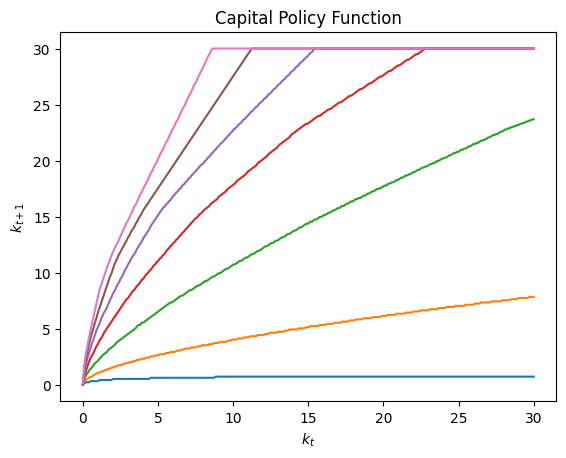

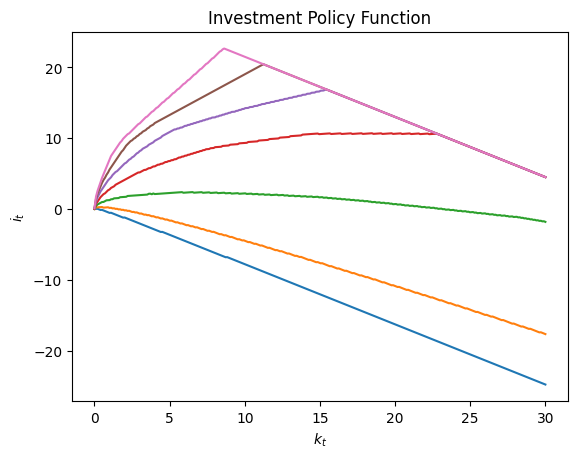

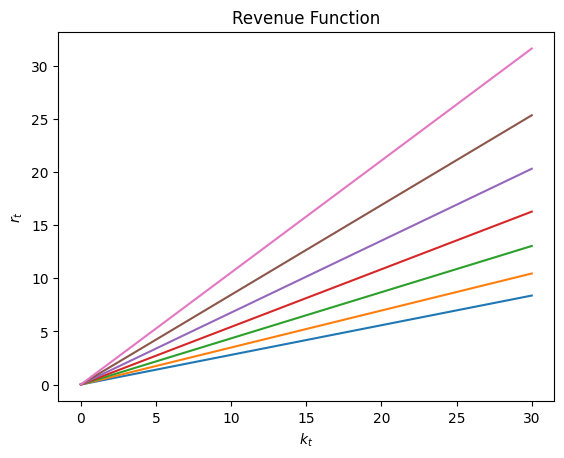

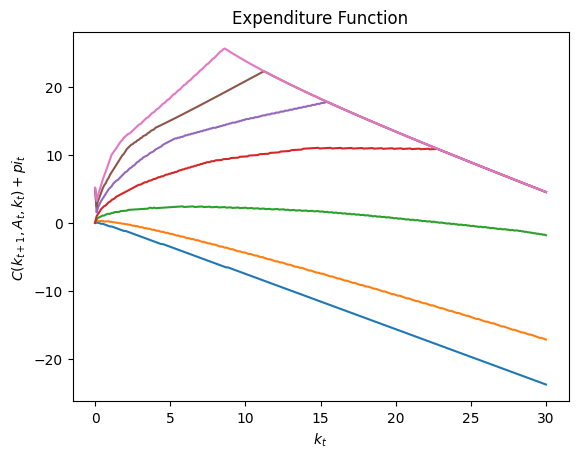

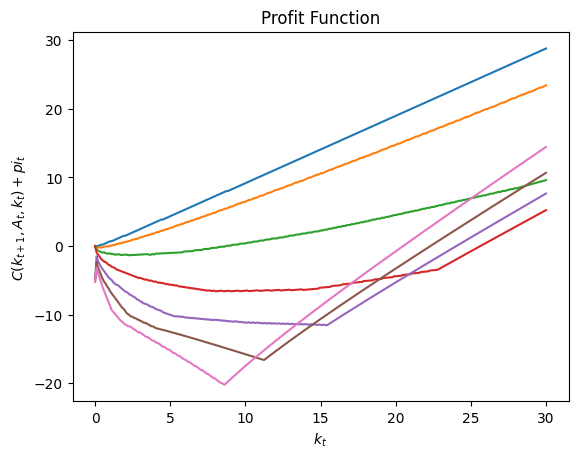

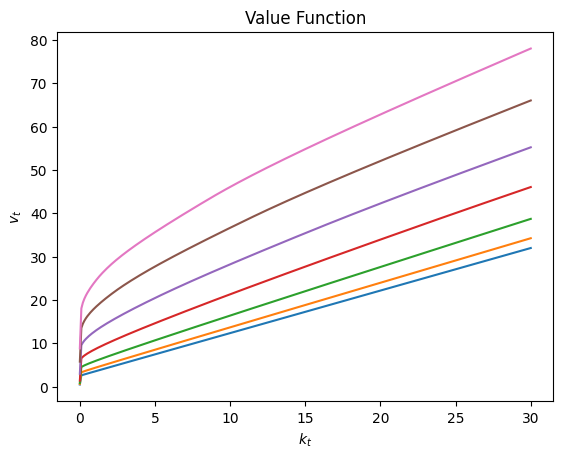

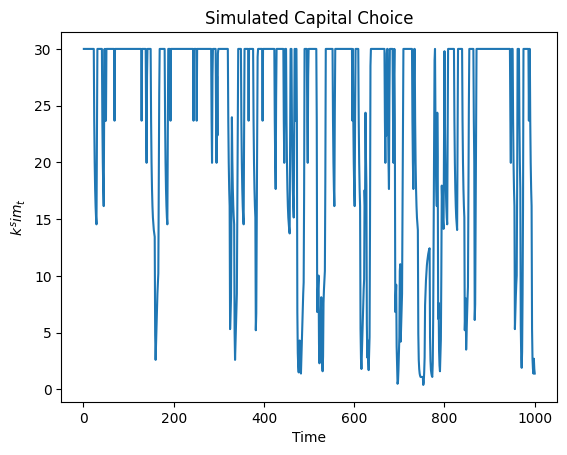

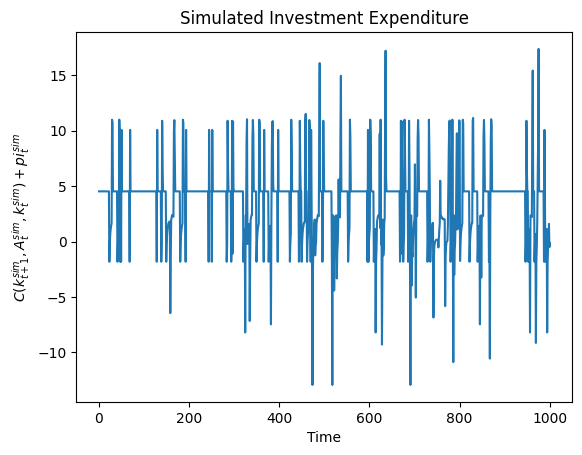

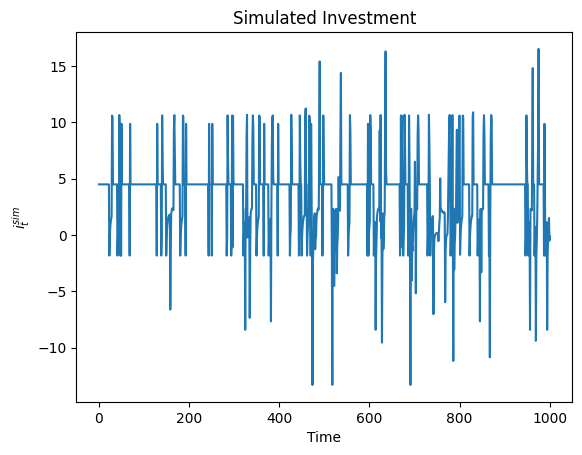

In [75]:
"""

run_slcm.py
-----------
This code solves the dynamic model of firm investment using value function iteration.

"""
#%% Stochastic Growth Model.
some_company = firm()

# Set the parameters, state space, and utility function.
some_company.setup(delta=0.15) # You can set the parameters here or use the defaults.

# Solve the model.
do_business(some_company) # Obtain the policy functions for consumption and savings.

# Simulate the model.
earn_profit(some_company) # Simulate forward in time.

# Graphs.
track_profit(some_company) # Plot policy functions and simulations.

## 3. Simulation for different values of gamma and beta

In [2]:
import matplotlib.pyplot as plt
import contextlib
import io

def track_changes_parameters(myClass, ax, gamma_val, delta_val):

    par = myClass.par # Parameters.
    sol = myClass.sol # Policy functions.
    sim = myClass.sim # Simulations.

    tgrid = linspace(1,par.T,par.T,dtype=int)

    COLOR_CAPITAL = "olive"
    COLOR_INVESTMENT = "maroon"

    ax1 = ax
    ax2 = ax1.twinx()

    ax1.plot(tgrid, sim.ksim, color=COLOR_CAPITAL)
    ax2.plot(tgrid, sim.isim, color=COLOR_INVESTMENT)

    ax1.set_xlabel("Time")
    ax1.set_ylabel("Capital", color=COLOR_CAPITAL)
    ax1.tick_params(axis="y", labelcolor=COLOR_CAPITAL)
    ax1.set_ylim(0,35)

    ax2.set_ylabel("Investment", color=COLOR_INVESTMENT)
    ax2.tick_params(axis="y", labelcolor=COLOR_INVESTMENT)
    ax2.set_ylim(0,10)

    ax1.set_title(f'Simulated Capital Choice and Investment (γ = {gamma_val}, δ = {delta_val})', fontsize=8)

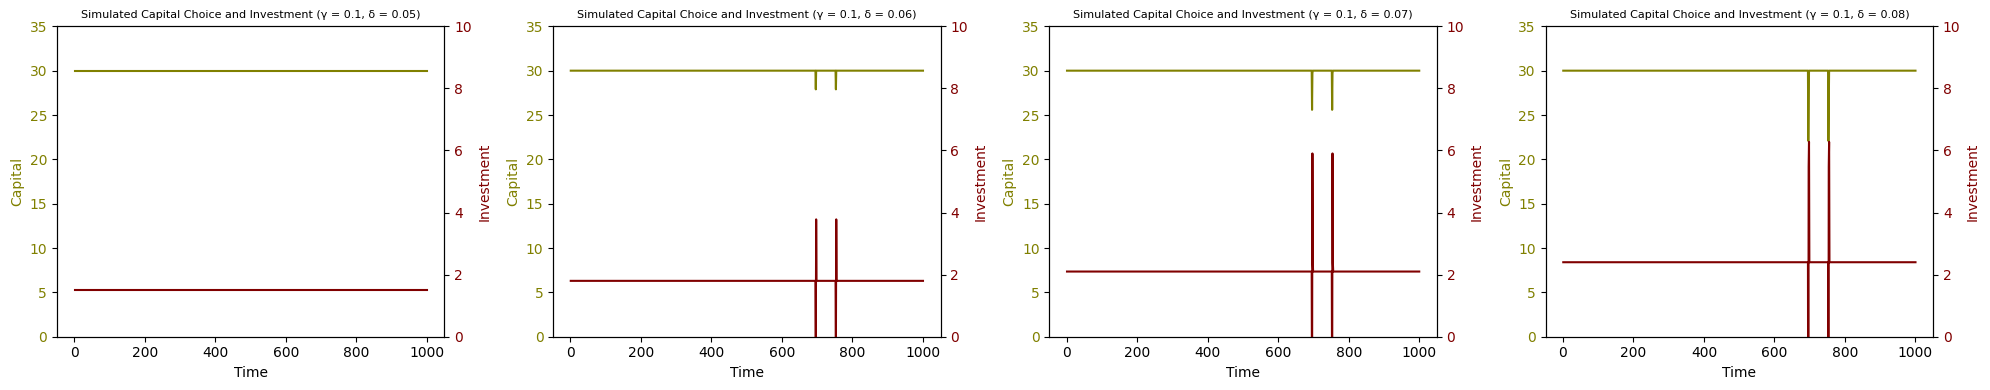

In [ ]:
# First simulation: gamma = 0.10, varying delta
gamma_values_1 = [0.10]
delta_values_1 = [0.05, 0.06, 0.07, 0.08]

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

for i, delta in enumerate(delta_values_1):
    with contextlib.redirect_stdout(io.StringIO()):
        some_company = firm()
        some_company.setup(gamma=gamma_values_1[0], delta=delta)
        do_business(some_company)
        earn_profit(some_company)

    track_changes_parameters(some_company, axs[i], gamma_values_1[0], delta_values_1[i])

plt.tight_layout()
plt.show()

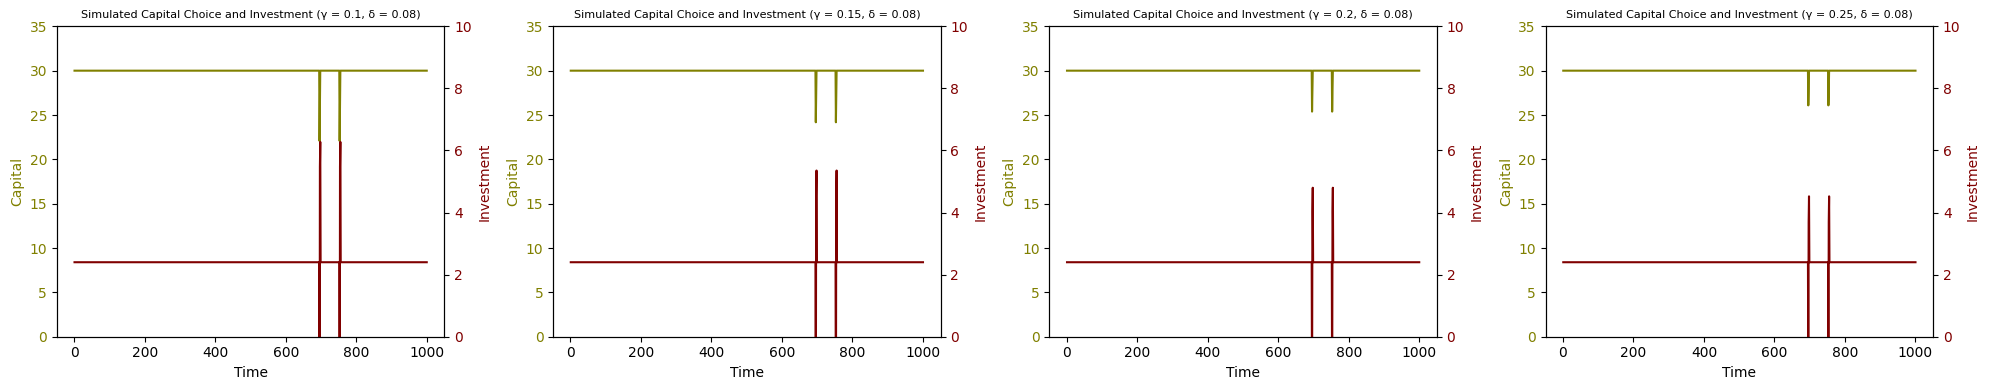

In [ ]:
# First simulation: delta = 0.08, varying gamma
delta_values_2 = [0.08]
gamma_values_2 = [0.10, 0.15, 0.20, 0.25]

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

for i, gamma in enumerate(gamma_values_2):
    with contextlib.redirect_stdout(io.StringIO()):
        some_company = firm()
        some_company.setup(gamma=gamma, delta=delta_values_2[0])
        do_business(some_company)
        earn_profit(some_company)

    track_changes_parameters(some_company, axs[i], gamma_values_2[i], delta_values_2[0])

plt.tight_layout()
plt.show()

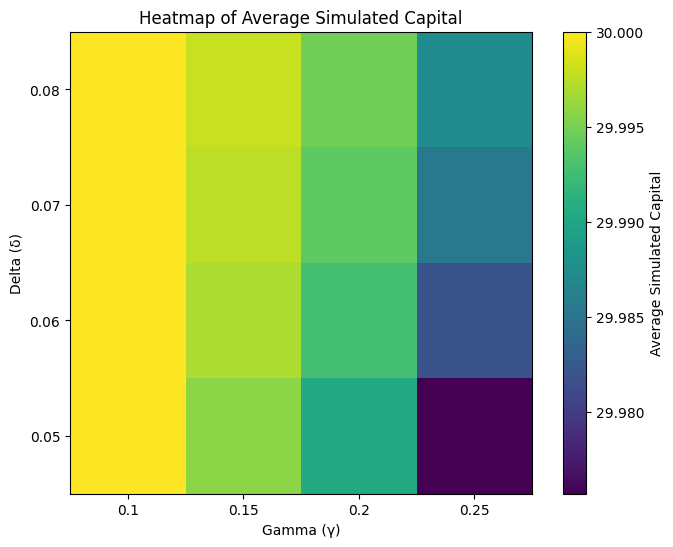

In [10]:
import numpy as np

gamma_values_3 = [0.10, 0.15, 0.20, 0.25]
delta_values_3 = [0.05, 0.06, 0.07, 0.08]

avg_capital = np.zeros((len(delta_values_3), len(gamma_values_3)))

for i, gamma in enumerate(gamma_values_3):
  for j, delta in enumerate(delta_values_3):
    with contextlib.redirect_stdout(io.StringIO()):
        some_company = firm()
        some_company.setup(gamma=gamma, delta=delta)
        do_business(some_company)
        earn_profit(some_company)

        avg_capital[i, j] = np.nanmean(some_company.sim.ksim)

# Create the heatmap
plt.figure(figsize=(8, 6))
im = plt.imshow(avg_capital, cmap='viridis', interpolation='nearest', origin='lower')
plt.colorbar(im, label='Average Simulated Capital')

# Set ticks and labels
plt.xticks(np.arange(len(gamma_values_3)), gamma_values_3)
plt.yticks(np.arange(len(delta_values_3)), delta_values_3)
plt.xlabel('Gamma (γ)')
plt.ylabel('Delta (δ)')
plt.title('Heatmap of Average Simulated Capital')

# Show the plot
plt.show()

## 4. Extended model with human capital

### a. Data

In [40]:
small_edu_df = small_filtered[(small_filtered["avg_edu_employees"] >= 0)]
small_edu_df.describe()

,idstd2015,id2015,year,revenue,debt,headcount,avg_edu_employees,labour_cost,total_investment,total_capital
count,39.000000,39.000000,39.0,3.900000e+01,3.500000e+01,39.000000,39.000000,3.900000e+01,2.300000e+01,2.900000e+01
mean,599243.974359,4287.410256,2015.0,6.304564e+09,2.297143e+09,45.179487,10.025641,1.360026e+09,1.406565e+09,3.488621e+09
std,268.858061,4529.784082,0.0,4.841935e+09,2.435935e+09,74.176841,2.454718,1.281306e+09,2.587097e+09,3.364795e+09
min,598835.000000,7.000000,2015.0,-9.000000e+00,1.000000e+08,5.000000,3.000000,-9.000000e+00,3.500000e+07,1.200000e+08
25%,599029.500000,886.000000,2015.0,2.150000e+09,3.500000e+08,13.000000,9.000000,5.250000e+08,1.150000e+08,1.000000e+09
50%,599200.000000,1689.000000,2015.0,5.000000e+09,1.500000e+09,22.000000,10.000000,1.000000e+09,3.000000e+08,2.400000e+09
75%,599477.000000,10171.500000,2015.0,8.594000e+09,3.300000e+09,32.500000,12.000000,1.558000e+09,1.600000e+09,5.500000e+09
max,599745.000000,11569.000000,2015.0,1.700000e+10,9.000000e+09,400.000000,16.000000,5.500000e+09,1.070000e+10,1.120000e+10


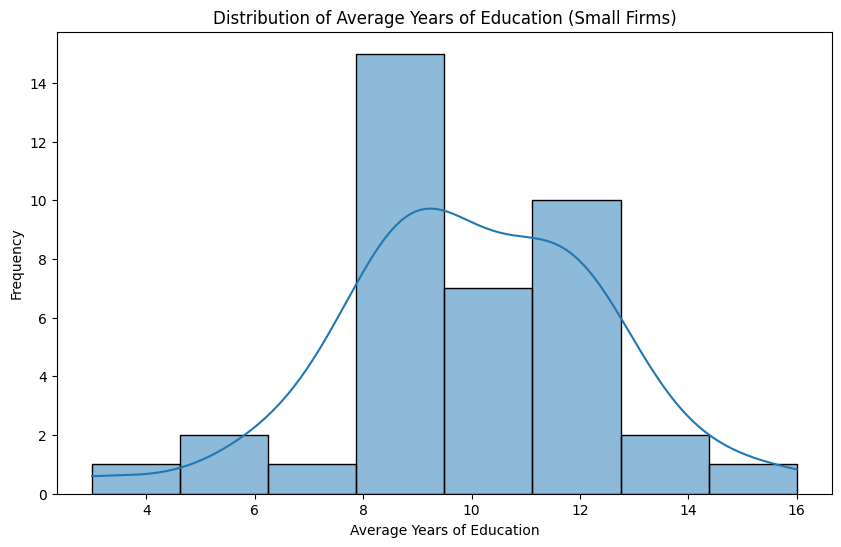

In [41]:
# Graph data for average years of education for SMALL FIRMS
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(small_edu_df['avg_edu_employees'], kde=True)
plt.title('Distribution of Average Years of Education (Small Firms)')
plt.xlabel('Average Years of Education')
plt.ylabel('Frequency')
plt.show()

In [43]:
large_edu_df = large_filtered[(large_filtered["avg_edu_employees"] >= 0)]
large_edu_df.describe()

,idstd2015,id2015,year,revenue,debt,headcount,avg_edu_employees,labour_cost,total_investment,total_capital
count,52.000000,52.000000,52.0,5.200000e+01,4.100000e+01,52.000000,52.000000,5.200000e+01,3.200000e+01,4.700000e+01
mean,599471.692308,7068.019231,2015.0,1.129654e+11,1.849251e+10,148.750000,10.942308,1.213892e+10,1.026625e+10,3.267809e+10
std,218.781612,4441.398854,0.0,9.218346e+10,2.312469e+10,172.449239,2.508132,2.604939e+10,1.356517e+10,2.540702e+10
min,598877.000000,254.000000,2015.0,2.415000e+10,8.000000e+06,6.000000,0.000000,-9.000000e+00,1.000000e+08,1.200000e+09
25%,599302.500000,2223.250000,2015.0,4.000000e+10,4.000000e+09,45.750000,9.000000,1.975000e+09,1.275000e+09,1.400000e+10
50%,599527.000000,10358.000000,2015.0,7.052000e+10,1.000000e+10,110.000000,12.000000,5.450000e+09,5.000000e+09,2.630000e+10
75%,599657.250000,10835.250000,2015.0,1.742000e+11,2.000000e+10,160.000000,12.000000,1.306250e+10,1.162500e+10,4.400000e+10
max,599784.000000,12831.000000,2015.0,4.079000e+11,1.000000e+11,1060.000000,16.000000,1.800000e+11,5.400000e+10,9.800000e+10


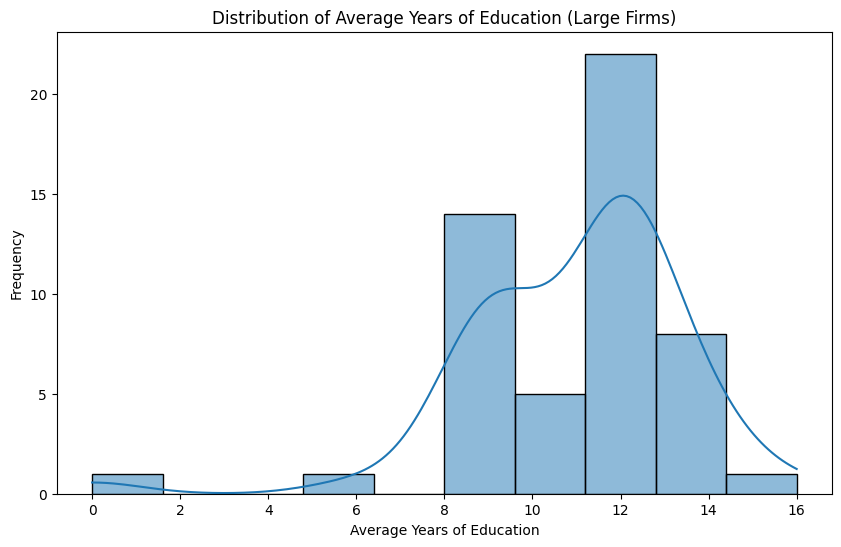

In [44]:
# Graph data for average years of education for LARGE FIRMS

plt.figure(figsize=(10, 6))
sns.histplot(large_edu_df['avg_edu_employees'], kde=True)
plt.title('Distribution of Average Years of Education (Large Firms)')
plt.xlabel('Average Years of Education')
plt.ylabel('Frequency')
plt.show()

### b. Model

In [95]:
"""

ext_model.py
--------
This code sets up the model.

"""

#%% Firm Investment Model.
class ext_firm():
    '''

    Methods:
        __init__(self,**kwargs) -> Set the firm's attributes.
        setup(self,**kwargs) -> Sets parameters.

    '''

    #%% Constructor.
    def __init__(self,**kwargs):
        '''

        This initializes the model.

        Optional kwargs:
            All parameters changed by setting kwarg.

        '''

        print('--------------------------------------------------------------------------------------------------')
        print('Model')
        print('--------------------------------------------------------------------------------------------------\n')
        print('   The model is an extended model of firm investment and is solved via Value Function Iteration.')

        print('\n--------------------------------------------------------------------------------------------------')
        print('Household')
        print('--------------------------------------------------------------------------------------------------\n')
        print('   The firm is infintely-lived.')
        print('   It chooses investment to maximize profit.')

    #%% Set up model.
    def ext_setup(self,**kwargs):
        '''

        This sets the parameters and creates the grids for the model.

            Input:
                self : Model class.
                kwargs : Values for parameters if not using the default.

        '''

        # Namespace for parameters, grids, and utility function.
        setattr(self,'par',SimpleNamespace())
        par = self.par

        print('\n--------------------------------------------------------------------------------')
        print('Parameters:')
        print('--------------------------------------------------------------------------------\n')

        # Technology.
        par.beta = 0.96 # Discount factor.
        par.alpha = 0.66 # Capital's share of income.
        par.theta = 0.4 # Labor's share of income.
        par.delta = 0.07 # Depreciation rate.

        # Production inputs and prices.
        par.w = 0.7 # Price of labour (wage).
        par.p = 1.0 # Price of investment.
        par.gamma = 0.1 # Speed of adjustment; cost function coefficient.
        par.s = 1.05 # Average years of schooling.
        par.phi = 0.09 # Returns on schooling.

        par.sigma_eps = 0.07 # Std. dev of productivity shocks.
        par.rho = 0.85 # Persistence of AR(1) process.
        par.mu = 0.0 # Intercept of AR(1) process.

        par.ylen = 7 # Grid size for y.
        par.m = 3 # Scaling parameter for Tauchen.

        # Simulation parameters.
        par.seed_sim = 2025 # Seed for simulation.
        par.T = 1000 # Number of time periods.

        # Set up asset grid.
        par.klen = 300 # Grid size for k.
        par.kmax = 30.0 # Upper bound for k.
        par.kmin = 0.0001 # Minimum k.

        # Set up labor grid.
        par.llen = par.klen # Grid size for l.

        # Discretized productivity.

        par.Alen = 7 # Grid size for A.
        par.m = 3 # Scaling parameter for Tauchen.

        # Update parameter values to kwarg values if you don't want the default values.
        for key,val in kwargs.items():
            setattr(par,key,val)

        assert par.beta > 0.0 and par.beta < 1.0
        assert par.alpha > 0.0 and par.alpha < 1.0
        assert par.delta >= 0.0 and par.delta <= 1.0
        assert par.sigma_eps > 0.00
        assert abs(par.sigma_eps) < 1.00
        assert par.p > 0.0
        assert par.gamma >= 0.0
        assert par.klen > 5
        assert par.kmax > par.kmin

        # Set up asset grid.
        par.kgrid = linspace(par.kmin,par.kmax,par.klen) # Equally spaced, linear grid for k (and k').

        # Set up labor grid.
        par.lgrid = linspace(par.kmin,par.kmax,par.llen) # Equally spaced, linear grid for k (and k').

        # Discretize productivity.
        Agrid,pmat = tauchen(par.mu,par.rho,par.sigma_eps,par.Alen,par.m) # Tauchen's Method to discretize the AR(1) process for log productivity.
        par.Agrid = exp(Agrid) # The AR(1) is in logs so exponentiate it to get A.
        par.pmat = pmat # Transition matrix.

        # Revenue and cost functions.
        par.production = production
        par.total_cost = total_cost

        print('beta: ',par.beta)
        print('alpha: ',par.alpha)
        print('delta: ',par.delta)
        print('kmin: ',par.kmin)
        print('kmax: ',par.kmax)
        print('gamma: ',par.gamma)

#%% Revenue Function.
def production(A,k,l,w,alpha,theta,hq):
    #Revenue function.
    output = A*(k**alpha)*((l*hq)**theta) # New line: Cobb-Douglas production with capital and labor.

    return output

#%% Cost function.

def total_cost(k,p,kgrid,delta,gamma):
    # Convex adjustment cost.

    invest = kgrid-(1.0-delta)*k
    adj_cost = (gamma/2.0)*((invest/k)**2.0)*k # Convex adjustment cost.
    cost = adj_cost + p*invest # Total investment cost.

    return cost


#%% Tauchen's Method.
def tauchen(mu,rho,sigma,N,m):
    """

    This function discretizes an AR(1) process.

            y(t) = mu + rho*y(t-1) + eps(t), eps(t) ~ NID(0,sigma^2)

    Input:
        mu    : Intercept of AR(1).
        rho   : Persistence of AR(1).
        sigma : Standard deviation of error term.
        N     : Number of states.
        m     : Parameter such that m time the unconditional std. dev. of the AR(1) is equal to the largest grid point.

    Output:
        y    : Grid for the AR(1) process.
        pmat : Transition probability matrix.

    """

    #%% Construct equally spaced grid.

    ar_mean = mu/(1.0-rho) # The mean of a stationary AR(1) process is mu/(1-rho).
    ar_sd = sigma/((1.0-rho**2.0)**(1/2)) # The std. dev of a stationary AR(1) process is sigma/sqrt(1-rho^2)

    y1 = ar_mean-(m*ar_sd) # Smallest grid point is the mean of the AR(1) process minus m*std.dev of AR(1) process.
    yn = ar_mean+(m*ar_sd) # Largest grid point is the mean of the AR(1) process plus m*std.dev of AR(1) process.

    y,d = linspace(y1,yn,N,endpoint=True,retstep=True) # Equally spaced grid. Include endpoint (endpoint=True) and record stepsize, d (retstep=True).

    #%% Compute transition probability matrix from state j (row) to k (column).

    ymatk = tile(expand_dims(y,axis=0),(N,1)) # Container for state next period.
    ymatj = mu+rho*ymatk.T # States this period.

    # In the following, loc and scale are the mean and std used to standardize the variable. # For example, norm.cdf(x,loc=y,scale=s) is the standard normal CDF evaluated at (x-y)/s.
    pmat = stats.norm.cdf(ymatk,loc=ymatj-(d/2.0),scale=sigma)-stats.norm.cdf(ymatk,loc=ymatj+(d/2.0),scale=sigma) # Transition probabilities to state 2, ..., N-1.
    pmat[:,0] = stats.norm.cdf(y[0],loc=mu+rho*y-(d/2.0),scale=sigma) # Transition probabilities to state 1.
    pmat[:,N-1] = 1.0-stats.norm.cdf(y[N-1],loc=mu+rho*y+(d/2.0),scale=sigma) # Transition probabilities to state N.

    #%% Output.

    y = expand_dims(y,axis=0) # Convert 0-dimensional array to a row vector.

    if count_nonzero(pmat.sum(axis=1)<0.999999) > 0:
        raise Exception("Some columns of transition matrix don't sum to 1.")

    return y,pmat

In [96]:
"""

solve.py
--------
This code solves the model.

"""

#%% Imports from Python
from numpy import argmax,squeeze,zeros,seterr
from numpy.linalg import norm
from types import SimpleNamespace
import time
seterr(divide='ignore')
seterr(invalid='ignore')

#%% Solve the model using Value Function Iteration.
def ext_do_business(myClass):
    '''

    This function solves the dynamic model of firm investment.

    Input:
        myClass : Model class with parameters, grids, cost function, and profit function.

    '''

    print('\n--------------------------------------------------------------------------------------------------')
    print('Solving the Model by Value Function Iteration')
    print('--------------------------------------------------------------------------------------------------\n')

    # Namespace for optimal policy funtions.
    setattr(myClass,'sol',SimpleNamespace())
    sol = myClass.sol

    # Model parameters, grids and functions.

    par = myClass.par # Parameters.

    beta = par.beta # Discount factor.
    alpha = par.alpha # Capital's share of income.
    theta = par.theta # Labor's share of income.
    delta = par.delta # Depreciation rate
    gamma = par.gamma # Speed of adjustment; cost function coefficient.
    phi = par.phi # Returns on schooling.

    s = par.s # Average years of schooling.
    w = par.w # Price of labour (wage).
    p = par.p # Price of investing in capital.

    hq = exp(phi*s)

    klen = par.klen # Grid size for k.
    kgrid = par.kgrid # Grid for k (state and choice).

    llen = par.llen # Grid size for l.
    lgrid = par.lgrid # Grid for l (choice).

    Alen = par.Alen # Grid size for A.
    Agrid = par.Agrid[0] # Grid for A.
    pmat = par.pmat # Grid for A.

    production = par.production # Revenue function.
    total_cost = par.total_cost # Cost function.

    # Value Function Iteration.
    v0 = zeros((klen,Alen)) # Guess of value function for each value of k.

    crit = 1e-6;
    maxiter = 10000;
    diff = 1;
    iter = 0;

    t0 = time.time()

    while (diff > crit) and (iter < maxiter): # Iterate on the Bellman Equation until convergence.

        v1 = zeros((klen,Alen)) # Container for V.
        k1 = zeros((klen,Alen)) # Container for k'.
        l1 = zeros((klen,Alen)) # Container for l.
        i1 = zeros((klen,Alen)) # Container for i.
        r1 = zeros((klen,Alen)) # Container for revenue.
        e1 = zeros((klen,Alen)) # Container for investment expenditure.
        p1 = zeros((klen,Alen)) # Container for profit.

        for q in range(0,klen): # Loop over the k-states.
            for j in range(0,Alen): # Loop over the A-states.

                # Macro variables.
                l = (theta*Agrid[j]*(kgrid[q]**alpha)*(hq**theta)/w)**(1/(1-theta)) # New line: solve for labor using first order condition, given A, k, l, w, alpha, theta, hq
                rev = production(Agrid[j],kgrid[q],l,w,alpha,theta,hq) # Revenue given A and K.
                expend = total_cost(kgrid[q],p,kgrid,delta,gamma) # Total investment expenditure given K.
                prof = rev - w*l - expend # Profit.
                invest = kgrid-(1.0-delta)*kgrid[q] # Investment in new capital.

                # Solve the maximization problem.
                ev = squeeze(v0@pmat[j,:].T); #  The next-period value function is the expected value function over each possible next-period A, conditional on the current state j.
                vall = prof + beta*ev # Compute the value function for each choice of k', given k.
                v1[q,j] = max(vall) # Maximize: vmax is the maximized value function; ind is where it is in the grid.
                k1[q,j] = kgrid[argmax(vall)] # Optimal k'.
                l1[q,j] = lgrid[argmax(vall)] # Optimal l.
                i1[q,j] = invest[argmax(vall)] # Optimal i.
                r1[q,j] = rev # Total revenue.
                e1[q,j] = expend[argmax(vall)] # Total cost.
                p1[q,j] = prof[argmax(vall)] # Profits.

        diff = norm(v1-v0) # Check convergence.
        v0 = v1; # Update guess.

        iter = iter + 1; # Update counter.

        # Print counter.
        if iter%25 == 0:
            print('Iteration: ',iter,'.\n')

    t1 = time.time()
    print('Elapsed time is ',t1-t0,' seconds.')
    print('Converged in ',iter,' iterations.')

    # Macro variables, value, and policy functions.
    sol.v = v1 # Firm value.
    sol.k = k1 # Capital policy function.
    sol.l = l1 # Labor policy function.
    sol.i = i1 # Investment policy function.
    sol.r = r1 # Revenue function.
    sol.e = e1 # Investment expenditure function.
    sol.p = p1 # Profit function.

In [97]:
"""

simulate.py
-----------
This code simulates the model.

"""

#%% Imports from Python
from numpy import cumsum,empty,linspace,nan,squeeze,where,zeros
from numpy.random import choice,rand,seed
from numpy.linalg import matrix_power
from types import SimpleNamespace

#%% Simulate the model.
def ext_earn_profit(myClass):
    '''

    This function simulates the dynamic model of firm investment.

    Input:
        myClass : Model class with parameters, grids, cost and revenue functions, and policy functions.

    '''

    print('\n--------------------------------------------------------------------------------------------------')
    print('Simulate the Model')
    print('--------------------------------------------------------------------------------------------------\n')

    # Namespace for simulation.
    setattr(myClass,'sim',SimpleNamespace())
    sim = myClass.sim

    # Model parameters, grids and functions.

    par = myClass.par # Parameters.
    sol = myClass.sol # Policy functions.

    par.seed_sim # Seed for simulation.

    klen = par.klen # Capital grid size.
    Alen = par.Alen # Productivity grid size.
    kgrid = par.kgrid # Capital today (state).
    Agrid = par.Agrid[0] # Productivity today (state).
    pmat = par.pmat # Productivity today (state).

    vpol = sol.v # Firm value.
    kpol = sol.k # Policy function for capital.
    ipol = sol.i # Policy function for investment.
    rpol = sol.r # Optimal revenue.
    epol = sol.e # Optimal total investment expenditure.
    ppol = sol.p # Optimal profit.

    T = par.T # Time periods.
    Asim = zeros((T*2,1)) # Container for simulated productivity.
    vsim = zeros((T*2,1)) # Container for simulated firm value.
    rsim = zeros((T*2,1)) # Container for simulated output.
    ksim = zeros((T*2,1)) # Container for simulated capital stock.
    isim = zeros((T*2,1)) # Container for simulated investment.
    esim = zeros((T*2,1)) # Container for simulated investment expenditure.
    psim = zeros((T*2,1)) # Container for simulated profit.

    # Begin simulation.

    seed(par.seed_sim)

    pmat0 = matrix_power(pmat,1000)
    pmat0 = pmat0[0,:] # % Stationary distribution.
    cmat = cumsum(par.pmat,axis=1) # CDF matrix.

    A0_ind = choice(linspace(0,Alen,Alen,endpoint=False,dtype=int),1,p=pmat0) # Index for initial productivity.
    k0_ind = choice(linspace(0,klen,klen,endpoint=False,dtype=int),1) # Index for initial capital stock.

    Asim[0] = Agrid[A0_ind] # Productivity in period 1.
    vsim[0] = vpol[k0_ind,A0_ind] # Firm value in period 1 given k0 and A0.
    ksim[0] = kpol[k0_ind,A0_ind] # Capital choice for period 2 given k0 and A0.
    isim[0] = ipol[k0_ind,A0_ind] # Investment in period 1 given k0 and A0.
    rsim[0] = rpol[k0_ind,A0_ind] # Revenue in period 1 given k0 and A0.
    esim[0] = epol[k0_ind,A0_ind] # Investment ependiture in period 1 given k0 and A0.
    psim[0] = ppol[k0_ind,A0_ind] # Profit in period 1 given k0 and A0.

    A1_ind = where(rand(1)<=squeeze(cmat[A0_ind,:])) # Draw productivity for next period.
    At_ind = A1_ind[0][0]

    # Simulate endogenous variables.

    for j in range(1,T*2): # Time loop.
        kt_ind = where(ksim[j-1]==kgrid); # Capital choice in the previous period is the state today. Find where the latter is on the grid.
        Asim[j] = Agrid[At_ind] # Productivity in period t.
        vsim[j] = vpol[kt_ind,At_ind] # Firm value in period t.
        ksim[j] = kpol[kt_ind,At_ind] # Capital stock for period t+1.
        isim[j] = ipol[kt_ind,At_ind] # Investment in period t.
        rsim[j] = rpol[kt_ind,At_ind] # Revenue in period t.
        esim[j] = epol[kt_ind,At_ind] # Investment expenditure in period t.
        psim[j] = ppol[kt_ind,At_ind] # Profit in period t.
        A1_ind = where(rand(1)<=squeeze(cmat[At_ind,:])) # Draw next state.
        At_ind = A1_ind[0][0] # State next period.

    # Simulated model.
    sim.Asim = Asim[T:2*T] # Simulated productivity.
    sim.vsim = vsim[T:2*T] # Simulated firm value.
    sim.ksim = ksim[T:2*T] # Simulated capital choice.
    sim.isim = isim[T:2*T] # Simulated investment.
    sim.rsim = rsim[T:2*T] # Simulated revenue.
    sim.esim = esim[T:2*T] # Simulated investment expenditure.
    sim.psim = psim[T:2*T] # Simulated profit.

    print('Simulation done.\n')
    print('--------------------------------------------------------------------------------------------------\n')

In [103]:
"""

my_graph.py
-----------
This code plots the value and policy functions.

"""

#%% Imports from Python
from matplotlib.pyplot import figure,plot,xlabel,ylabel,title,show
from numpy import linspace

#%% Plot the model functions and simulations.
def ext_track_profit(myClass):
    '''

    This function plots the model functions and simulations.

    Input:
        myClass : Model class with parameters, grids, cost and revenue functions, policy functions, and simulations.

    '''

    # Model parameters, policy and value functions, and simulations.
    par = myClass.par # Parameters.
    sol = myClass.sol # Policy functions.
    sim = myClass.sim # Simulations.

    #Plot capital policy function.

    figure(1)
    plot(par.kgrid,sol.k)
    xlabel('$k_t$')
    ylabel('$k_{t+1}$')
    title('Capital Policy Function (Extended Model)')

    # Plot investment policy function.

    figure(2)
    plot(par.kgrid,sol.i)
    xlabel('$k_t$')
    ylabel('$i_t$')
    title('Investment Policy Function (Extended Model)')

    # Plot revenue function.

    figure(3)
    plot(par.kgrid,sol.r)
    xlabel('$k_t$')
    ylabel('$r_t$')
    title('Revenue Function (Extended Model)')

    # Plot expenditure function.

    figure(4)
    plot(par.kgrid,sol.e)
    xlabel('$k_t$')
    ylabel('$C(k_{t+1},A_t,k_t)+pi_t$')
    title('Expenditure Function (Extended Model)')

    # Plot profit function.

    figure(5)
    plot(par.kgrid,sol.p)
    xlabel('$k_t$')
    ylabel('$C(k_{t+1},A_t,k_t)+pi_t$')
    title('Profit Function (Extended Model)')

    # Plot value function.

    figure(6)
    plot(par.kgrid,sol.v)
    xlabel('$k_t$')
    ylabel('$v_t$')
    title('Value Function (Extended Model)')

    tgrid = linspace(1,par.T,par.T,dtype=int)

    # Plot simulated capital choice.

    figure(7)
    plot(tgrid,sim.ksim)
    xlabel('Time')
    ylabel('$k^sim_t$')
    title('Simulated Capital Choice (Extended Model)')

    # Plot simulated investment expenditure.

    figure(8)
    plot(tgrid,sim.esim)
    xlabel('Time')
    ylabel('$C(k^{sim}_{t+1},A^{sim}_t,k^{sim}_t)+pi^{sim}_t$')
    title('Simulated Investment Expenditure (Extended Model)')

    # Plot simulated investment.

    figure(9)
    plot(tgrid,sim.isim)
    xlabel('Time')
    ylabel('$i^{sim}_t$')
    title('Simulated Investment (Extended Model)')

    figure(10)
    plot(tgrid,sim.ksim/sim.psim)
    xlabel('Time')
    ylabel('K/Y')
    title('Simulated Capital-to-Output (Extended Model)')

    figure(11)
    plot(tgrid,sim.isim/sim.psim)
    xlabel('Time')
    ylabel('I/Y')
    title('Simulated Investment-to-Output (Extended Model)')

    #show()

--------------------------------------------------------------------------------------------------
Model
--------------------------------------------------------------------------------------------------

   The model is an extended model of firm investment and is solved via Value Function Iteration.

--------------------------------------------------------------------------------------------------
Household
--------------------------------------------------------------------------------------------------

   The firm is infintely-lived.
   It chooses investment to maximize profit.

--------------------------------------------------------------------------------
Parameters:
--------------------------------------------------------------------------------

beta:  0.96
alpha:  0.6
delta:  0.12
kmin:  0.0001
kmax:  30.0
gamma:  0.1

--------------------------------------------------------------------------------------------------
Solving the Model by Value Function Iteration
--------------

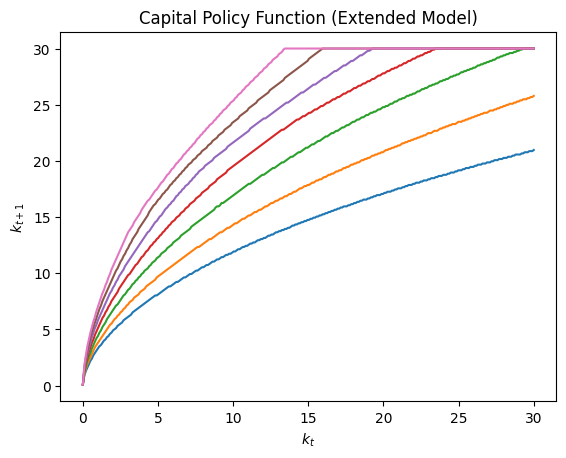

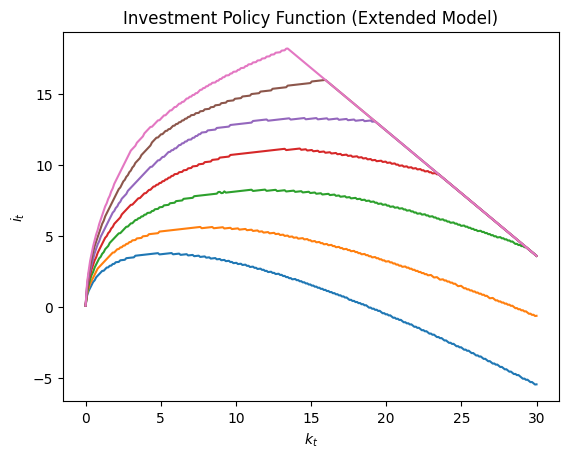

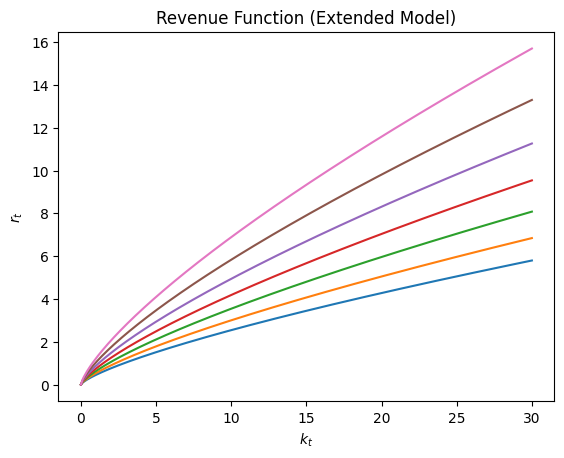

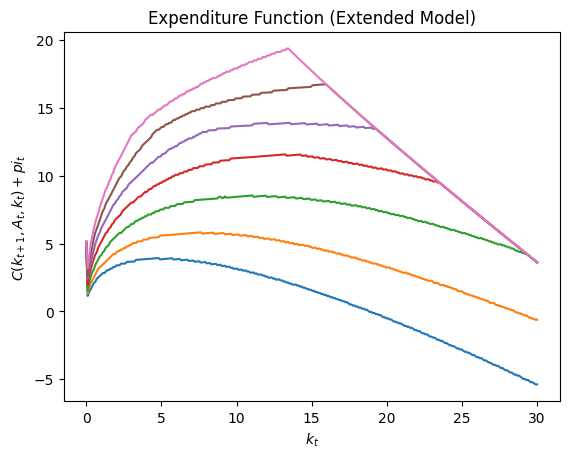

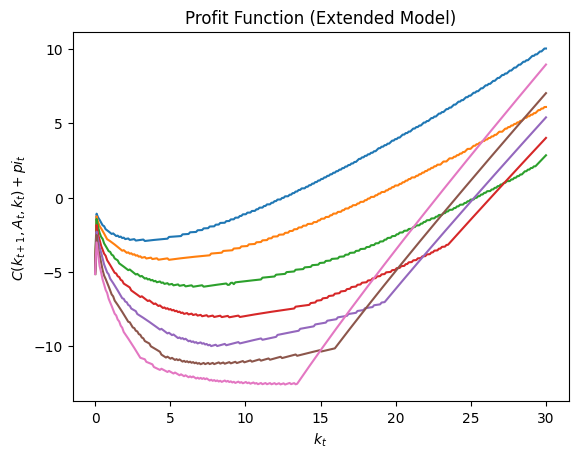

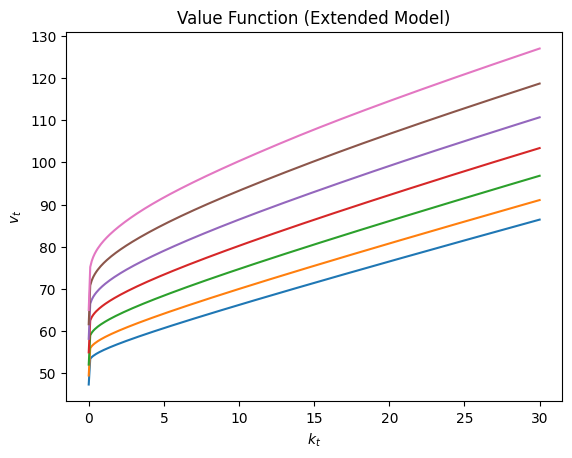

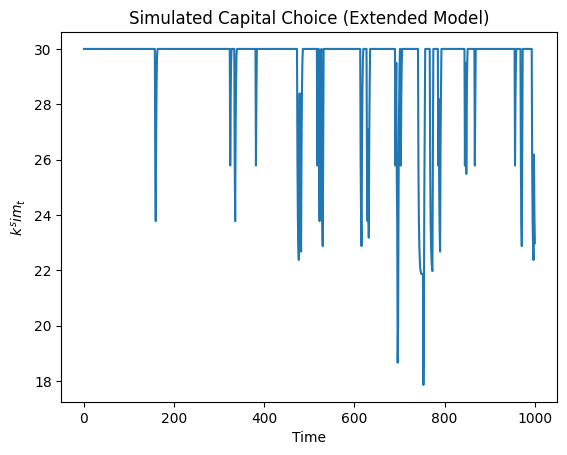

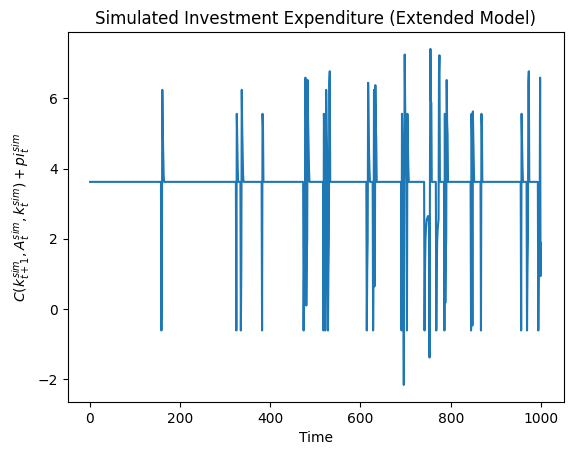

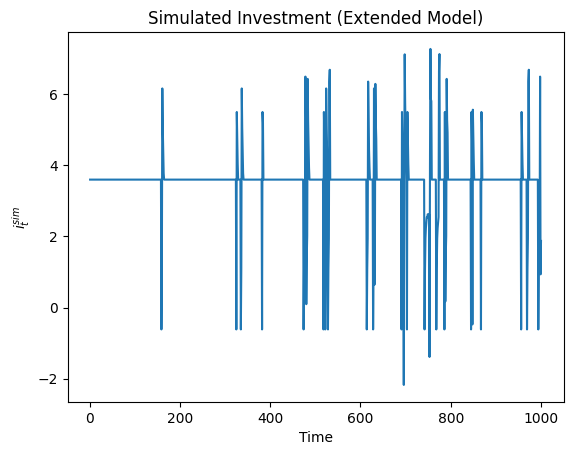

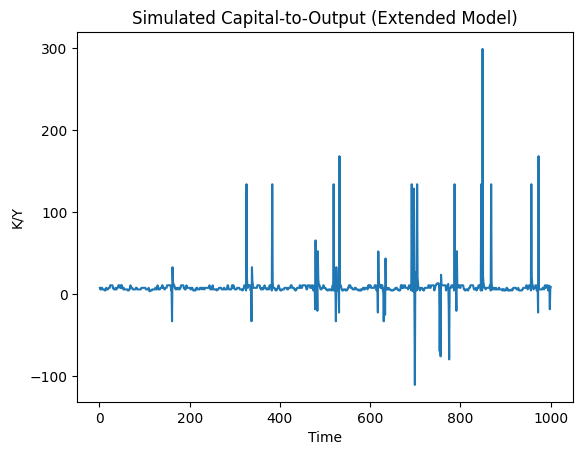

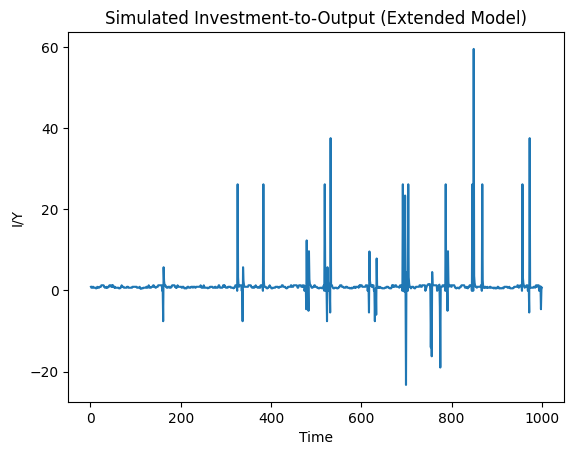

In [106]:
"""

run_slcm.py
-----------
This code solves the dynamic model of firm investment using value function iteration.

"""
#%% Stochastic Growth Model.
some_company = ext_firm()

# Set the parameters, state space, and utility function.
some_company.ext_setup(s=0.8,gamma=0.1,delta=0.12,alpha=0.6,theta=0.2) # You can set the parameters here or use the defaults.

# Solve the model.
ext_do_business(some_company) # Obtain the policy functions for consumption and savings.

# Simulate the model.
ext_earn_profit(some_company) # Simulate forward in time.

# Graphs.
ext_track_profit(some_company) # Plot policy functions and simulations.